# Outlier Detection
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
# Percentile
---

In [5]:
h = np.random.randint(145,195,50)

In [24]:
height = pd.DataFrame(data = h, columns = ["height"])

In [25]:
height.sample(10)

,height
47,182
22,155
39,171
27,161
24,151
7,158
31,184
5,159
11,188
12,160


In [26]:
outlier_dict = {"height": [120,98,112,210,215,218]}

outlier = pd.DataFrame(outlier_dict)

In [27]:
outlier

,height
0,120
1,98
2,112
3,210
4,215
5,218


In [33]:
height = pd.concat([height, outlier], axis = 0, ignore_index =True)

In [35]:
height.tail(10)

,height
46,167
47,182
48,155
49,172
50,120
51,98
52,112
53,210
54,215
55,218


In [36]:
height.describe()

,height
count,56.000000
mean,168.589286
std,22.498304
min,98.000000
25%,155.750000
50%,168.000000
75%,185.250000
max,218.000000


In [52]:
height.quantile(0.05), height.quantile(0.95)

(height    138.75
 Name: 0.05, dtype: float64,
 height    198.0
 Name: 0.95, dtype: float64)

In [56]:
new_height = height[(height["height"] > height["height"].quantile(0.05)) & (height["height"] < height["height"].quantile(0.95))]

In [57]:
height.count(), new_height.count()

(height    56
 dtype: int64,
 height    50
 dtype: int64)

---
# Standard deviation, Z score
---

In [59]:
score = np.random.normal(loc = 100, scale = 17, size = 500)

In [60]:
score = pd.DataFrame(data = score, columns = ["score"])

In [61]:
score

,score
0,94.817248
1,113.474494
2,89.198057
3,77.070375
4,95.752832
...,...
495,102.315746
496,82.595222
497,86.093461
498,78.184410


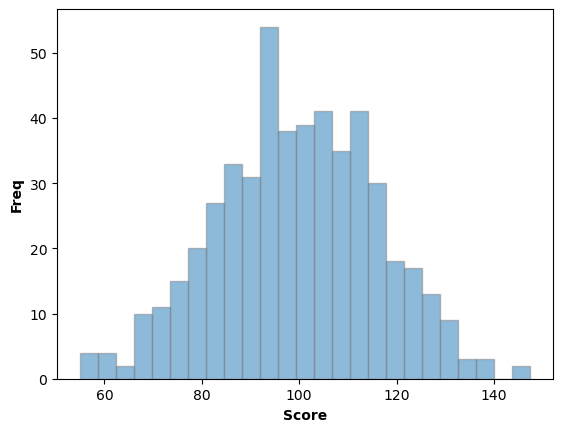

In [68]:
plt.hist(score["score"], bins = 25, alpha = 0.5, edgecolor = "grey")
plt.xlabel("Score", weight = "bold")
plt.ylabel("Freq", weight = "bold")

plt.show()

In [69]:
score.describe()

,score
count,500.000000
mean,99.527572
std,16.550999
min,54.881636
25%,88.122377
50%,99.396064
75%,111.877318
max,147.508246
